The Perceptron algorithm helps separate things into two different groups. For example, if we have data about apples and bananas, we can use it to have the Perceptron tell you if something is an apple or a banana.

The idea behind the Perceptron is simple: you can just draw a straight line (like a fence) through the middle of your data to separate the apples from the bananas.

-------

**Pseudocode**

Function Train_Perceptron(training_data, labels, learning_rate, number_iterations):
     Initializes weights (w) and bias (b) to zero or small random values
    
     For each iteration from 1 to number_iterations:
         For each training example (x_i, y_i) in training_data, labels:
             Calculates the prediction as prediction = sign(w * x_i + b) where "sign" returns 1 if positive or 0 if negative.
            
             If the prediction prediction does not match y_i:
                 Update the weights and bias:
                 w = w + learning_rate * (y_i - prediction) * x_i
                 b = b + learning_rate * (y_i - prediction)
    
     Return trained weights and bias


**Implementation**

For this implementation we use an example similar to knn where my model receives points that will be classified into two classes in this case 1 and -1. When carrying out the entire training process, my perceptron can draw a line that separates my classes, so when I send it a new point like 2.2, this point falls in the area designated for class -1, so my prediction will be -1

Prediction: -1


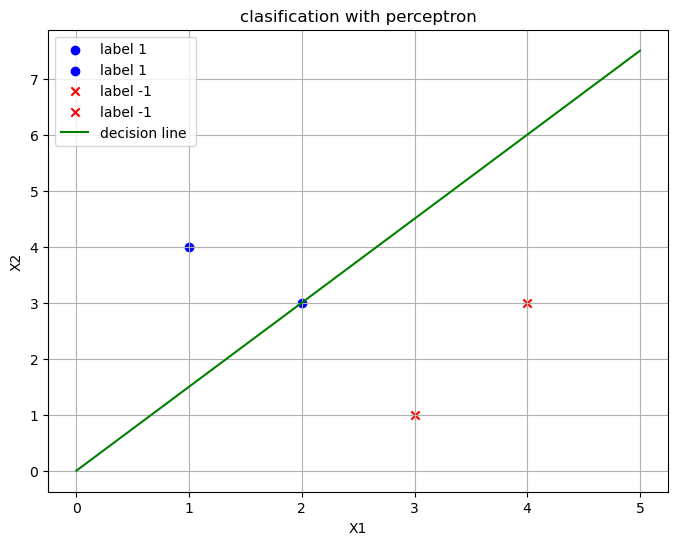

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, num_features, learning_rate=0.1):
        self.weights = np.zeros(num_features)
        self.bias = 0
        self.learning_rate = learning_rate

    def predict(self, x):
        z = np.dot(self.weights, x) + self.bias
        return 1 if z > 0 else -1

    def train(self, X, y, epochs):
        for _ in range(epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                if prediction != y[i]:
                    update = self.learning_rate * (y[i] - prediction)
                    self.weights += update * X[i]
                    self.bias += update


X = np.array([[2, 3], [1, 4], [3, 1], [4, 3]])
y = np.array([1, 1, -1, -1])

perceptron = Perceptron(num_features=2, learning_rate=0.1)
perceptron.train(X, y, epochs=100)


new_example = np.array([2, 2])
prediction = perceptron.predict(new_example)
print("Prediction:", prediction)


plt.figure(figsize=(8, 6))


for i in range(len(X)):
    if y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='blue', marker='o', label='label 1')
    else:
        plt.scatter(X[i, 0], X[i, 1], color='red', marker='x', label='label -1')


w = perceptron.weights
b = perceptron.bias
x_line = np.linspace(0, 5, 100)
y_line = (-w[0] * x_line - b) / w[1]
plt.plot(x_line, y_line, label='decision line ', color='green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='best')
plt.title('clasification with perceptron')
plt.grid()
plt.show()



The Perceptron code does not contain a function that calculates how wrong the algorithm is in its predictions or a formula to gradually improve its performance. The Perceptron simply corrects itself when it makes mistakes, as if it were learning from its mistakes. If it predicts incorrectly, it adjusts its "internal rules" to try to do better next time.